In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

In [2]:
clu1 = pd.read_csv('../Catalogues/NGC1027_7_Pop1.csv')
clu1

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,41.201628,59.656903,464342520829593344,1.0068,0.0660,4.342,-2.224,3.729,31,1.360,...,1.052,16.880320,17.795835,15.946208,1.849627,NaN,41.256803,41.201648,59.656886,1.039312
1,41.232326,59.705194,464342903081036416,1.0499,0.5364,4.949,-3.707,3.279,95,NaN,...,1.091,19.948261,20.885586,18.634525,2.251060,NaN,41.294932,41.232358,59.705180,1.072682
2,41.462683,59.710449,464343693356691584,0.9441,0.8736,3.393,-1.366,3.106,95,NaN,...,1.144,20.509865,21.450420,19.443134,2.007286,NaN,41.253587,41.462695,59.710435,0.989440
3,41.374021,59.780477,464344857292120448,1.0057,0.0784,3.355,-0.820,3.253,95,NaN,...,1.383,16.351807,16.780066,15.037567,1.742498,NaN,41.335595,41.374028,59.780463,1.038540
4,41.374105,59.780285,464344861591533184,0.9535,0.1107,3.986,-0.838,3.897,95,NaN,...,1.062,17.125492,NaN,NaN,NaN,NaN,41.335401,41.374113,59.780267,0.996131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,39.617189,63.511763,514165756379101824,0.9694,0.4082,4.309,-3.310,2.758,31,1.324,...,1.234,19.599651,20.522327,18.594452,1.927876,NaN,45.075769,39.617222,63.511751,0.992511
1533,38.981766,63.393227,514171395671851392,0.9461,0.0618,3.448,-2.496,2.379,31,1.413,...,1.031,17.066260,17.787018,16.247305,1.539713,NaN,45.092901,38.981790,63.393216,0.975958
1534,38.087581,63.147178,514185792397960448,0.8660,0.6806,3.654,-1.628,3.272,95,NaN,...,1.004,20.488153,21.318087,19.580004,1.738083,NaN,45.049216,38.087597,63.147163,0.911623
1535,38.329809,63.246442,514187128128013184,0.9210,0.1910,3.536,-1.175,3.335,31,1.331,...,0.994,18.922003,19.932730,17.953028,1.979702,NaN,45.089891,38.329821,63.246428,0.937843


In [3]:
clu2 = pd.read_csv('../Catalogues/NGC1027_8_Pop2.csv')
clu2

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,41.623957,59.703399,464340188661593472,0.8678,0.3916,2.502,-0.567,2.437,95,NaN,...,1.001,19.757400,21.037899,18.698357,2.339542,NaN,41.214907,41.623962,59.703388,0.893857
1,41.526110,59.663305,464340390525839616,0.8485,0.2780,3.447,-3.042,1.622,95,NaN,...,0.991,19.291763,20.494804,18.243275,2.251530,NaN,41.197618,41.526137,59.663297,0.867277
2,41.493276,59.797474,464344552348174336,0.8856,0.3377,3.142,-2.768,1.487,95,NaN,...,1.071,19.456285,20.727522,18.367048,2.360474,NaN,41.327361,41.493301,59.797467,0.910681
3,40.980968,59.688050,464349289698115072,0.8867,0.2345,2.782,-1.835,2.091,95,NaN,...,0.987,19.125140,20.321392,18.140501,2.180891,NaN,41.329821,40.980984,59.688040,0.911681
4,41.024832,59.701610,464349637592001664,0.9095,0.8894,2.544,-1.885,1.709,95,NaN,...,1.179,20.555613,21.214590,19.459024,1.755566,NaN,41.333401,41.024849,59.701602,0.955963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,40.110682,63.534996,515662844529779712,0.9504,0.5817,2.250,-1.597,1.585,95,NaN,...,1.036,20.335096,20.963730,19.283390,1.680340,NaN,45.001656,40.110698,63.534989,0.990722
2567,39.879872,63.562059,515663737882709504,0.9108,0.1520,3.135,-1.317,2.845,31,1.349,...,1.047,18.463370,19.455551,17.507929,1.947622,NaN,45.070410,39.879885,63.562046,0.932990
2568,39.926834,63.580962,515664081480440448,0.9778,0.4284,1.968,-0.710,1.835,95,NaN,...,1.003,20.067148,20.842766,19.177397,1.665369,NaN,45.078426,39.926841,63.580954,1.009689
2569,40.138478,63.544578,515664360654018432,1.0549,0.3833,3.333,-3.219,0.864,95,NaN,...,1.008,19.755924,20.753645,18.861647,1.891998,NaN,45.004979,40.138510,63.544575,1.080472


In [4]:
df_cg =  pd.read_csv('../Catalogues/NGC1027_CG2020.csv')
df_cg

,Cluster,RA_ICRS,DE_ICRS,GLON,GLAT,pmRA,pmDE,Plx,SimbadName,_RA_icrs,_DE_icrs,Source,RV,Gmag,BP-RP,Proba
0,NGC_1027,41.570275,61.173409,136.328293,1.324807,-1.470,2.096,0.7914,Gaia DR2 464949661706849280,41.570288,61.173400,464949661706849280,NaN,16.2073,1.3947,0.9
1,NGC_1027,41.771635,61.197550,136.405622,1.388252,-1.212,1.874,0.9171,NaN,41.771646,61.197542,464949043231528064,NaN,17.0693,1.5686,0.1
2,NGC_1027,41.654500,61.223745,136.343410,1.387672,-1.608,2.285,0.9511,Gaia DR2 464950211462625792,41.654515,61.223736,464950211462625792,NaN,16.5363,1.4369,1.0
3,NGC_1027,42.006470,61.494344,136.378944,1.704568,-2.197,1.900,0.8709,Gaia DR2 464960858681114112,42.006490,61.494336,464960858681114112,NaN,15.2663,1.2747,0.6
4,NGC_1027,41.198422,61.013537,136.233536,1.103690,-2.151,2.891,0.7366,NaN,41.198441,61.013525,465597956950392960,NaN,17.7557,1.7619,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,NGC_1027,40.356278,62.084899,135.421994,1.910282,-1.930,2.197,0.9448,Gaia DR2 465984336508841088,40.356296,62.084890,465984336508841088,NaN,17.1310,1.5709,0.6
478,NGC_1027,40.288922,62.095503,135.388874,1.907002,-1.604,1.737,0.8338,Gaia DR2 465983718033549184,40.288937,62.095495,465983718033549184,NaN,14.4602,1.0533,0.5
479,NGC_1027,40.392914,62.043920,135.454514,1.879991,-1.061,2.337,0.9791,NaN,40.392924,62.043909,465984022968173568,NaN,17.7680,1.9701,0.3
480,NGC_1027,40.219980,62.132763,135.344168,1.927779,-1.848,2.148,0.8976,Gaia DR2 465986947848942208,40.219997,62.132754,465986947848942208,NaN,14.2488,1.0201,1.0


In [5]:
df_vg =  pd.read_csv('../Catalogues/NGC1027_vG2023.csv')
df_vg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
0,NGC_1027,464951723292819968,41.772135,61.274116,0.6217,-1.782,2.180,20.267270,21.371332,19.017168,0.14
1,NGC_1027,464951718989883648,41.779064,61.282946,0.5958,-1.377,2.178,19.770304,20.728146,18.736492,0.07
2,NGC_1027,465565182055866752,40.242362,60.604988,0.6284,-1.446,1.902,19.578695,20.702978,18.411455,0.07
3,NGC_1027,464950211462625792,41.654500,61.223746,0.9554,-1.741,1.936,16.519371,17.166830,15.747625,1.00
4,NGC_1027,464950074017174144,41.706367,61.227523,0.9045,-2.173,1.719,19.949920,21.067705,18.782500,0.19
...,...,...,...,...,...,...,...,...,...,...,...
1375,NGC_1027,465682103948024320,40.527086,61.684232,0.8644,-2.316,1.874,11.910837,12.088751,11.595915,1.00
1376,NGC_1027,465682035228745984,40.490942,61.678906,0.8660,-1.312,2.082,16.132994,16.789839,15.288035,1.00
1377,NGC_1027,465682005172847488,40.472969,61.653809,0.8779,-1.946,2.045,14.885021,15.356849,14.236008,1.00
1378,NGC_1027,465682520568867328,40.578721,61.703776,0.8366,-1.964,2.524,13.101703,13.398318,12.616863,1.00


### Taking only the members of CG+2020 and vG+2023 that has Pmemb>0.7

In [6]:
kk, = np.where(df_cg.Proba >= 0.7)

In [7]:
dfcg = df_cg.iloc[kk]

In [8]:
jj, = np.where(df_vg.Pmemb >= 0.7)

In [9]:
dfvg = df_vg.iloc[jj]

In [10]:
dfcg

,Cluster,RA_ICRS,DE_ICRS,GLON,GLAT,pmRA,pmDE,Plx,SimbadName,_RA_icrs,_DE_icrs,Source,RV,Gmag,BP-RP,Proba
0,NGC_1027,41.570275,61.173409,136.328293,1.324807,-1.470,2.096,0.7914,Gaia DR2 464949661706849280,41.570288,61.173400,464949661706849280,NaN,16.2073,1.3947,0.9
2,NGC_1027,41.654500,61.223745,136.343410,1.387672,-1.608,2.285,0.9511,Gaia DR2 464950211462625792,41.654515,61.223736,464950211462625792,NaN,16.5363,1.4369,1.0
6,NGC_1027,41.223036,61.324415,136.112845,1.390442,-1.940,2.067,0.9421,Gaia DR2 465611945664660736,41.223053,61.324406,465611945664660736,NaN,16.5048,1.3985,0.9
8,NGC_1027,40.433808,61.163490,135.834957,1.085701,-1.345,2.505,0.7979,Gaia DR2 465617954318554112,40.433820,61.163479,465617954318554112,NaN,17.4744,1.8212,0.8
9,NGC_1027,41.236699,61.276217,136.139187,1.349544,-1.574,2.314,0.8491,Gaia DR2 465610704414118144,41.236713,61.276207,465610704414118144,NaN,17.1227,1.7638,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,NGC_1027,39.491028,61.758812,135.181654,1.447177,-1.968,1.965,0.9033,Gaia DR2 465881978848172416,39.491046,61.758803,465881978848172416,NaN,15.2779,1.2934,1.0
469,NGC_1027,39.209244,61.618336,135.114765,1.265184,-1.673,1.887,0.7873,Gaia DR2 465867650836499200,39.209260,61.618328,465867650836499200,NaN,16.4719,1.5521,1.0
470,NGC_1027,39.747569,61.607218,135.353956,1.357072,-1.920,2.328,0.9400,Gaia DR2 465876481290243200,39.747587,61.607208,465876481290243200,NaN,11.6728,0.6146,1.0
475,NGC_1027,40.516561,62.135372,135.469522,1.987174,-2.010,2.138,0.8016,Gaia DR2 465984748825655424,40.516579,62.135363,465984748825655424,NaN,14.6934,1.0973,0.9


In [11]:
dfvg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
3,NGC_1027,464950211462625792,41.654500,61.223746,0.9554,-1.741,1.936,16.519371,17.166830,15.747625,1.00
5,NGC_1027,464949661706849280,41.570274,61.173409,0.8300,-1.596,2.023,16.192581,16.815716,15.430469,1.00
10,NGC_1027,465821265193693184,41.527225,62.399228,0.9978,-1.830,2.110,15.333253,15.886968,14.608139,1.00
15,NGC_1027,464952681062317696,42.129509,61.202537,0.8452,-1.683,2.050,17.742489,18.591160,16.850595,0.95
16,NGC_1027,464952685363761920,42.117877,61.201853,0.9092,-1.717,2.039,15.829679,16.399100,15.107857,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1374,NGC_1027,465682138307961984,40.502905,61.688217,0.7229,-1.701,2.168,17.668420,18.450249,16.765095,0.78
1375,NGC_1027,465682103948024320,40.527086,61.684232,0.8644,-2.316,1.874,11.910837,12.088751,11.595915,1.00
1376,NGC_1027,465682035228745984,40.490942,61.678906,0.8660,-1.312,2.082,16.132994,16.789839,15.288035,1.00
1377,NGC_1027,465682005172847488,40.472969,61.653809,0.8779,-1.946,2.045,14.885021,15.356849,14.236008,1.00


### The cluster we believe is NGC2539 in our sample is Clu1, so we make a crossmatch of it with this literature data

Match with Cantat-Gaudin+2020.

In [13]:
ra1 = clu1.RA_ICRS
dec1 = clu1.DE_ICRS

ra2 = dfcg.RA_ICRS
dec2 = dfcg.DE_ICRS

In [14]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from Cantat-Gaudin+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [15]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [16]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [17]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [18]:
clu1.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
189,41.570274,61.173409,464949661706849280,0.8300,0.0378,2.577,-1.596,2.023,31,1.440,...,1.041,16.192581,16.815716,15.430469,1.385247,NaN,42.572996,41.570289,61.173400,0.858649
190,41.654500,61.223746,464950211462625792,0.9554,0.0447,2.603,-1.741,1.936,31,1.433,...,0.919,16.519371,17.166830,15.747625,1.419205,NaN,42.602652,41.654516,61.223737,0.984442
372,41.209813,61.006434,465597755092954240,0.8735,0.0226,2.731,-1.759,2.089,31,1.467,...,1.040,14.797569,15.339229,14.089526,1.249702,NaN,42.490896,41.209829,61.006425,0.906890
376,40.922414,61.094239,465602702895244800,0.9349,0.0354,2.764,-1.855,2.050,31,1.455,...,1.014,15.765883,16.284992,14.968859,1.316134,NaN,42.627734,40.922431,61.094230,0.967899
382,41.048801,61.210897,465609536182815360,0.8934,0.1147,2.763,-1.796,2.100,31,1.353,...,1.031,17.792515,18.752975,16.841764,1.911211,NaN,42.709319,41.048818,61.210887,0.923362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,39.829041,61.962056,465891152898391936,0.9195,0.0136,2.720,-1.874,1.971,31,1.566,...,0.918,13.433594,13.734810,12.965410,0.769400,NaN,43.633611,39.829059,61.962048,0.952745
1012,39.860498,62.075317,465893283202122624,0.8818,0.0421,2.821,-1.427,2.433,31,1.448,...,0.972,16.018957,16.614326,15.273240,1.341086,NaN,43.730044,39.860512,62.075306,0.911838
1013,39.903317,62.069143,465893592439768320,0.9084,0.0355,2.788,-1.854,2.083,31,1.438,...,1.056,15.574017,16.203865,14.799580,1.404285,NaN,43.715977,39.903335,62.069134,0.941404
1088,40.516560,62.135372,465984748825655424,0.8318,0.0223,3.015,-2.007,2.251,31,1.498,...,1.031,14.682241,15.133806,14.042489,1.091317,-24.84,43.655545,40.516579,62.135362,0.864589


In [19]:
dfcg.iloc[matched_idx_catalog2]

,Cluster,RA_ICRS,DE_ICRS,GLON,GLAT,pmRA,pmDE,Plx,SimbadName,_RA_icrs,_DE_icrs,Source,RV,Gmag,BP-RP,Proba
0,NGC_1027,41.570275,61.173409,136.328293,1.324807,-1.470,2.096,0.7914,Gaia DR2 464949661706849280,41.570288,61.173400,464949661706849280,NaN,16.2073,1.3947,0.9
2,NGC_1027,41.654500,61.223745,136.343410,1.387672,-1.608,2.285,0.9511,Gaia DR2 464950211462625792,41.654515,61.223736,464950211462625792,NaN,16.5363,1.4369,1.0
23,NGC_1027,41.209813,61.006434,136.241543,1.099585,-1.785,1.980,0.8581,Gaia DR2 465597755092954240,41.209829,61.006425,465597755092954240,NaN,14.8095,1.2573,1.0
26,NGC_1027,40.922415,61.094238,136.078369,1.120711,-1.856,2.039,0.9633,Gaia DR2 465602702895244800,40.922431,61.094230,465602702895244800,NaN,15.7761,1.2946,1.0
28,NGC_1027,41.048802,61.210896,136.084766,1.252189,-1.704,1.943,0.7572,Gaia DR2 465609536182815360,41.048817,61.210888,465609536182815360,NaN,17.8325,1.8912,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,NGC_1027,39.829042,61.962056,135.246094,1.697319,-1.832,2.051,0.8913,Gaia DR2 465891152898391936,39.829059,61.962047,465891152898391936,NaN,13.4452,0.7767,1.0
443,NGC_1027,39.860499,62.075316,135.213819,1.806887,-1.376,2.415,0.8502,Gaia DR2 465893283202122624,39.860511,62.075306,465893283202122624,NaN,16.0359,1.3490,0.7
444,NGC_1027,39.903318,62.069143,135.234667,1.809354,-1.851,2.212,0.9191,Gaia DR2 465893592439768320,39.903335,62.069133,465893592439768320,NaN,15.5850,1.4102,1.0
475,NGC_1027,40.516561,62.135372,135.469522,1.987174,-2.010,2.138,0.8016,Gaia DR2 465984748825655424,40.516579,62.135363,465984748825655424,NaN,14.6934,1.0973,0.9


Text(0, 0.5, 'DEC (deg)')

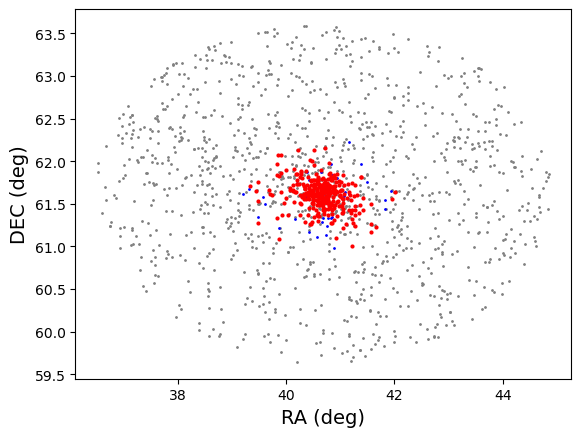

In [20]:
fig, ax = plt.subplots()

ax.scatter(clu1.RA_ICRS, clu1.DE_ICRS, s=1, c='grey')
ax.scatter(dfcg.RA_ICRS, dfcg.DE_ICRS, s=1, c='b')
ax.scatter(clu1.iloc[matched_idx_catalog1].RA_ICRS, clu1.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-52.5,-56.5)
#ax.set_xlim(222.5,229.5)

Informations:

- Membership by GMM: 1537
- Membership by Cantat-Gaudin(Pmemb>0.7): 377
- Membership crossmatch: 328

In [21]:
population1 = clu1.iloc[matched_idx_catalog1]

Match with vanGroeningen+2020.

In [29]:
ra1 = clu1.RA_ICRS
dec1 = clu1.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [30]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vanGroeningen+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [31]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [32]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [33]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [34]:
clu1.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
113,41.391974,60.440972,464797963461759488,0.8665,0.0250,2.589,-1.793,1.868,31,1.439,...,1.104,15.092919,15.710403,14.297459,1.412945,NaN,41.937564,41.391990,60.440964,0.900277
124,41.760686,60.667446,464824798418117120,0.9060,0.0240,2.491,-1.459,2.020,31,1.451,...,1.008,15.022243,15.609508,14.280652,1.328855,NaN,42.072503,41.760699,60.667437,0.939593
128,41.971368,60.869426,464833766309733248,0.8965,0.0135,2.625,-1.530,2.133,31,1.545,...,0.970,13.546622,13.889764,13.031779,0.857985,NaN,42.216559,41.971382,60.869417,0.930231
132,41.851684,60.892326,464836652527754368,0.9197,0.0136,2.608,-1.809,1.878,31,1.540,...,1.006,12.826741,13.182690,12.293089,0.889601,NaN,42.260835,41.851700,60.892318,0.941174
141,41.581220,61.004063,464850770077768704,0.8678,0.0230,2.656,-1.653,2.079,31,1.437,...,1.014,14.985799,15.615413,14.209435,1.405977,NaN,42.415918,41.581235,61.004054,0.901501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,39.368128,62.490349,466057728911784448,0.9044,0.0256,2.856,-2.004,2.034,31,1.451,...,0.945,15.149142,15.735953,14.405804,1.330150,NaN,44.203078,39.368148,62.490340,0.937237
1159,39.696708,63.156088,466112807573205248,0.9259,0.0314,2.759,-1.952,1.950,31,1.460,...,1.006,15.738831,16.299076,15.020844,1.278232,NaN,44.739631,39.696727,63.156079,0.958138
1315,41.991454,62.738428,467345360106608000,0.9009,0.0461,2.854,-1.732,2.268,31,1.452,...,1.002,16.083628,16.674650,15.347731,1.326920,NaN,43.921722,41.991470,62.738418,0.929409
1436,38.075159,62.268499,513984032015800064,0.8460,0.0231,2.857,-1.970,2.068,31,1.488,...,0.980,14.957641,15.442095,14.297846,1.144249,NaN,44.262748,38.075178,62.268490,0.878511


In [35]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
479,NGC_1027,464797963461759488,41.391974,60.440972,0.8665,-1.793,1.868,15.092919,15.710403,14.297459,0.99
307,NGC_1027,464824798418117120,41.760686,60.667446,0.9060,-1.459,2.020,15.022243,15.609508,14.280652,0.99
289,NGC_1027,464833766309733248,41.971368,60.869426,0.8965,-1.530,2.133,13.546622,13.889764,13.031779,1.00
293,NGC_1027,464836652527754368,41.851684,60.892326,0.9197,-1.809,1.878,12.826741,13.182690,12.293089,1.00
264,NGC_1027,464850770077768704,41.581220,61.004063,0.8678,-1.653,2.079,14.985799,15.615413,14.209435,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1092,NGC_1027,466057728911784448,39.368128,62.490349,0.9044,-2.004,2.034,15.149142,15.735953,14.405804,1.00
71,NGC_1027,466112807573205248,39.696708,63.156088,0.9259,-1.952,1.950,15.738831,16.299076,15.020844,0.83
85,NGC_1027,467345360106608000,41.991454,62.738428,0.9009,-1.732,2.268,16.083628,16.674650,15.347731,0.92
160,NGC_1027,513984032015800064,38.075159,62.268499,0.8460,-1.970,2.068,14.957641,15.442095,14.297846,0.98


Text(0, 0.5, 'DEC (deg)')

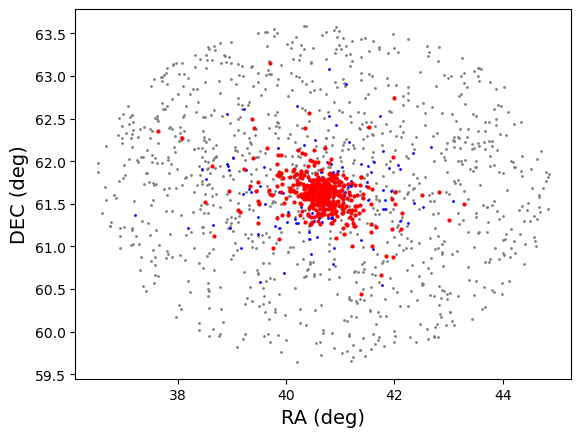

In [36]:
fig, ax = plt.subplots()

ax.scatter(clu1.RA_ICRS, clu1.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(clu1.iloc[matched_idx_catalog1].RA_ICRS, clu1.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-52.5,-56.5)
#ax.set_xlim(222.5,229.5)

Informations:

- Membership by GMM: 1537
- Membership by van Groeningen(Pmemb>0.7): 597
- Membership crossmatch: 448

In [37]:
population2 = clu1.iloc[matched_idx_catalog1]

### The second population we have chosen is thought to have members from NGC2539 that the GMM couldn't identify as belonging to the cluster. In here we test this hipotesis

Match with Cantat-Gaudin+2020.

In [12]:
ra1 = clu2.RA_ICRS
dec1 = clu2.DE_ICRS

ra2 = dfcg.RA_ICRS
dec2 = dfcg.DE_ICRS

In [13]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from Cantat-Gaudin+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [14]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [15]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [16]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [43]:
clu2.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
787,40.883954,60.977974,465599812376152448,0.9126,0.0491,2.594,-1.471,2.137,31,1.416,...,0.988,16.164633,16.862309,15.345198,1.517111,NaN,42.529206,40.883967,60.977964,0.941769
823,40.566852,61.112257,465613869810235776,0.8263,0.0889,2.683,-1.991,1.799,31,1.394,...,1.024,17.273977,18.071709,16.394646,1.677063,NaN,42.714595,40.566870,61.112249,0.857201
834,40.433807,61.163490,465617954318554112,0.9145,0.0899,2.822,-1.555,2.354,31,1.367,...,1.009,17.450153,18.343956,16.531420,1.812536,NaN,42.787732,40.433822,61.163480,0.946949
848,40.850411,61.341167,465625758279504768,0.8936,0.0867,2.857,-2.143,1.890,31,1.351,...,0.980,17.445694,18.397396,16.483128,1.914268,NaN,42.867205,40.850431,61.341158,0.927134
884,40.166289,61.316399,465646369819233152,0.9878,0.1105,2.838,-1.909,2.100,31,1.351,...,0.960,17.870052,18.870697,16.925976,1.944721,NaN,42.980211,40.166307,61.316390,1.016958
927,40.779472,61.534424,465676576334468352,0.9182,0.0615,2.506,-1.933,1.594,31,1.416,...,1.060,16.935408,17.629023,16.093990,1.535032,NaN,43.057305,40.779490,61.534417,0.947983
994,41.817304,61.440901,465709591742328576,0.9154,0.0584,2.538,-1.561,2.001,31,1.383,...,0.961,16.881020,17.703257,15.995484,1.707772,NaN,42.769777,41.817319,61.440892,0.946446
1000,41.833071,61.542762,465712516619396352,0.8377,0.0966,2.599,-1.571,2.071,31,1.382,...,0.998,17.555767,18.418793,16.670725,1.748068,NaN,42.859911,41.833085,61.542753,0.868760
1003,41.928675,61.655383,465713513051918976,0.8635,0.0696,2.773,-1.643,2.234,31,1.406,...,1.001,17.065365,17.796772,16.234787,1.561985,NaN,42.944533,41.928690,61.655373,0.893734
1108,40.845117,61.838972,465778556039769856,0.9408,0.0538,2.783,-2.254,1.633,95,NaN,...,1.032,16.644726,17.326363,15.840570,1.485793,NaN,43.321820,40.845138,61.838965,0.971297


In [44]:
dfcg.iloc[matched_idx_catalog2]


,Cluster,RA_ICRS,DE_ICRS,GLON,GLAT,pmRA,pmDE,Plx,SimbadName,_RA_icrs,_DE_icrs,Source,RV,Gmag,BP-RP,Proba
19,NGC_1027,40.883954,60.977974,136.110116,1.007323,-1.424,2.308,0.8653,Gaia DR2 465599812376152448,40.883967,60.977964,465599812376152448,NaN,16.1814,1.5207,0.7
21,NGC_1027,40.566852,61.112257,135.914617,1.065561,-1.838,2.112,0.7280,Gaia DR2 465613869810235776,40.566869,61.112248,465613869810235776,NaN,17.2973,1.6649,0.7
8,NGC_1027,40.433808,61.163490,135.834957,1.085701,-1.345,2.505,0.7979,Gaia DR2 465617954318554112,40.433820,61.163479,465617954318554112,NaN,17.4744,1.8212,0.8
156,NGC_1027,40.850412,61.341167,135.943562,1.330498,-2.079,2.225,0.8912,Gaia DR2 465625758279504768,40.850431,61.341157,465625758279504768,NaN,17.4664,1.9318,0.9
179,NGC_1027,40.166290,61.316399,135.654811,1.172352,-1.893,2.183,0.9793,Gaia DR2 465646369819233152,40.166307,61.316390,465646369819233152,NaN,17.8996,1.9186,0.8
199,NGC_1027,40.779472,61.534424,135.832051,1.491966,-1.786,1.704,0.8905,Gaia DR2 465676576334468352,40.779488,61.534417,465676576334468352,NaN,16.9479,1.5373,0.7
342,NGC_1027,41.817305,61.440900,136.320553,1.617311,-1.507,2.111,0.8600,Gaia DR2 465709591742328576,41.817318,61.440891,465709591742328576,NaN,16.9029,1.7264,0.9
344,NGC_1027,41.833071,61.542762,136.283405,1.712461,-1.698,2.045,1.0099,Gaia DR2 465712516619396352,41.833087,61.542753,465712516619396352,NaN,17.5827,1.7253,0.7
316,NGC_1027,41.928675,61.655383,136.275764,1.833675,-1.589,2.032,0.8677,Gaia DR2 465713513051918976,41.928690,61.655374,465713513051918976,NaN,17.0874,1.5728,0.9
412,NGC_1027,40.845118,61.838972,135.733203,1.781717,-2.254,1.947,0.8482,Gaia DR2 465778551732745984,40.845138,61.838963,465778551732745984,NaN,16.6591,1.4772,0.7


Text(0, 0.5, 'DEC (deg)')

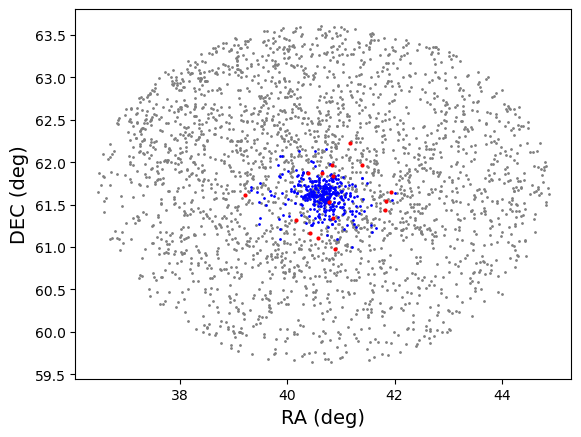

In [45]:
fig, ax = plt.subplots()

ax.scatter(clu2.RA_ICRS, clu2.DE_ICRS, s=1, c='grey')
ax.scatter(dfcg.RA_ICRS, dfcg.DE_ICRS, s=1, c='b')
ax.scatter(clu2.iloc[matched_idx_catalog1].RA_ICRS, clu2.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-52.5,-56.5)
#ax.set_xlim(222.5,229.5)

Informations:
- Membership crossmatch: 16

In [17]:
population1_lost = clu2.iloc[matched_idx_catalog1]

Match with vanGroeningen+2020.

In [18]:
ra1 = clu2.RA_ICRS
dec1 = clu2.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [19]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vanGroeningen+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [20]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [21]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [22]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [52]:
clu2.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
174,41.773826,60.540374,464776037646911104,0.8545,0.1063,2.811,-1.799,2.160,31,1.362,...,0.988,17.921892,18.853360,16.956484,1.896875,NaN,41.953426,41.773842,60.540364,0.882463
237,41.611977,60.973933,464850499494348160,0.9201,0.0283,2.533,-1.594,1.968,31,1.427,...,0.995,15.476273,16.141022,14.678472,1.462549,NaN,42.382331,41.611992,60.973924,0.953797
240,41.387135,61.069233,464853660598221568,0.8285,0.0914,2.552,-1.825,1.784,31,1.386,...,1.369,17.162060,17.907494,16.247490,1.660004,NaN,42.513499,41.387151,61.069225,0.859669
314,42.251070,61.276006,464941655887679104,0.8647,0.0477,2.355,-1.681,1.650,31,1.428,...,1.070,16.552422,17.206670,15.765858,1.440813,NaN,42.535251,42.251086,61.275999,0.893889
334,42.129509,61.202537,464952681062317696,0.8452,0.0953,2.652,-1.683,2.050,31,1.381,...,0.990,17.742489,18.591160,16.850595,1.740564,NaN,42.491296,42.129525,61.202528,0.874296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,40.799686,62.532005,466023644050466560,0.9817,0.0642,2.630,-1.725,1.986,31,1.393,...,0.998,17.081020,17.874979,16.217472,1.657507,NaN,43.960869,40.799703,62.531996,1.012394
1603,39.226658,62.617307,466071434144149120,0.9070,0.0485,2.808,-1.993,1.979,31,1.414,...,0.970,16.447214,17.155657,15.630446,1.525211,NaN,44.345737,39.226677,62.617298,0.936223
1903,42.672829,62.162159,467252240914244480,0.9654,0.0409,2.769,-1.700,2.186,31,1.426,...,1.007,16.238014,16.906803,15.442007,1.464796,NaN,43.267141,42.672845,62.162149,0.994258
2072,41.114886,62.905429,467535884855567872,0.9308,0.0180,2.818,-1.936,2.048,31,1.433,...,0.945,8.369972,9.017055,7.584709,1.432346,-43.63,44.239616,41.114905,62.905420,0.959092


In [53]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
399,NGC_1027,464776037646911104,41.773826,60.540374,0.8545,-1.799,2.160,17.921892,18.853360,16.956484,0.79
263,NGC_1027,464850499494348160,41.611977,60.973933,0.9201,-1.594,1.968,15.476273,16.141022,14.678472,1.00
345,NGC_1027,464853660598221568,41.387135,61.069233,0.8285,-1.825,1.784,17.162060,17.907494,16.247490,0.97
28,NGC_1027,464941655887679104,42.251070,61.276006,0.8647,-1.681,1.650,16.552422,17.206670,15.765858,0.95
15,NGC_1027,464952681062317696,42.129509,61.202537,0.8452,-1.683,2.050,17.742489,18.591160,16.850595,0.95
...,...,...,...,...,...,...,...,...,...,...,...
1140,NGC_1027,466023644050466560,40.799686,62.532005,0.9817,-1.725,1.986,17.081020,17.874979,16.217472,0.95
1100,NGC_1027,466071434144149120,39.226658,62.617307,0.9070,-1.993,1.979,16.447214,17.155657,15.630446,0.99
406,NGC_1027,467252240914244480,42.672829,62.162159,0.9654,-1.700,2.186,16.238014,16.906803,15.442007,1.00
72,NGC_1027,467535884855567872,41.114886,62.905429,0.9308,-1.936,2.048,8.369972,9.017055,7.584709,1.00


Text(0, 0.5, 'DEC (deg)')

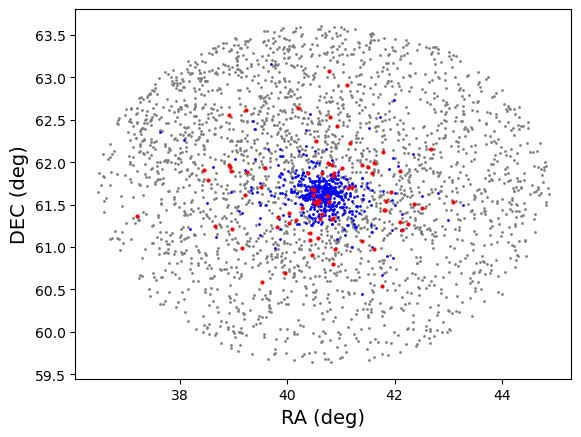

In [54]:
fig, ax = plt.subplots()

ax.scatter(clu2.RA_ICRS, clu2.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(clu2.iloc[matched_idx_catalog1].RA_ICRS, clu2.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-52.5,-56.5)
#ax.set_xlim(222.5,229.5)

Informations:
- Membership crossmatch: 78

In [23]:
population2_lost = clu2.iloc[matched_idx_catalog1]

### Now we build an catalogue joining members of the crossmatches, both the primary members and the "lost ones"

- Members from the crossmatch with CG+2020.

In [56]:
population1

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
189,41.570274,61.173409,464949661706849280,0.8300,0.0378,2.577,-1.596,2.023,31,1.440,...,1.041,16.192581,16.815716,15.430469,1.385247,NaN,42.572996,41.570289,61.173400,0.858649
190,41.654500,61.223746,464950211462625792,0.9554,0.0447,2.603,-1.741,1.936,31,1.433,...,0.919,16.519371,17.166830,15.747625,1.419205,NaN,42.602652,41.654516,61.223737,0.984442
372,41.209813,61.006434,465597755092954240,0.8735,0.0226,2.731,-1.759,2.089,31,1.467,...,1.040,14.797569,15.339229,14.089526,1.249702,NaN,42.490896,41.209829,61.006425,0.906890
376,40.922414,61.094239,465602702895244800,0.9349,0.0354,2.764,-1.855,2.050,31,1.455,...,1.014,15.765883,16.284992,14.968859,1.316134,NaN,42.627734,40.922431,61.094230,0.967899
382,41.048801,61.210897,465609536182815360,0.8934,0.1147,2.763,-1.796,2.100,31,1.353,...,1.031,17.792515,18.752975,16.841764,1.911211,NaN,42.709319,41.048818,61.210887,0.923362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,39.829041,61.962056,465891152898391936,0.9195,0.0136,2.720,-1.874,1.971,31,1.566,...,0.918,13.433594,13.734810,12.965410,0.769400,NaN,43.633611,39.829059,61.962048,0.952745
1012,39.860498,62.075317,465893283202122624,0.8818,0.0421,2.821,-1.427,2.433,31,1.448,...,0.972,16.018957,16.614326,15.273240,1.341086,NaN,43.730044,39.860512,62.075306,0.911838
1013,39.903317,62.069143,465893592439768320,0.9084,0.0355,2.788,-1.854,2.083,31,1.438,...,1.056,15.574017,16.203865,14.799580,1.404285,NaN,43.715977,39.903335,62.069134,0.941404
1088,40.516560,62.135372,465984748825655424,0.8318,0.0223,3.015,-2.007,2.251,31,1.498,...,1.031,14.682241,15.133806,14.042489,1.091317,-24.84,43.655545,40.516579,62.135362,0.864589


Text(0, 0.5, 'DEC (deg)')

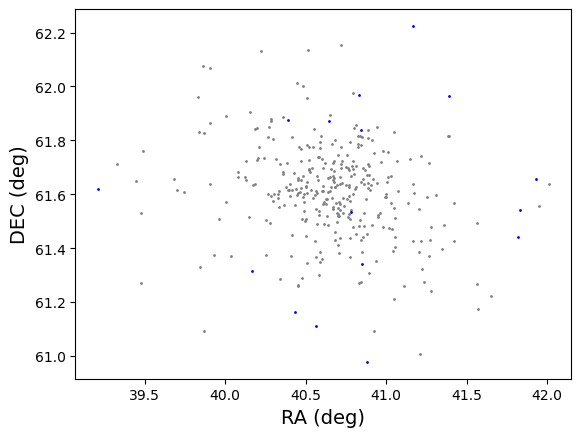

In [58]:
fig, ax = plt.subplots()

ax.scatter(population1.RA_ICRS, population1.DE_ICRS, s=1, c='grey')
ax.scatter(population1_lost.RA_ICRS, population1_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-52.5,-56.5)
#ax.set_xlim(222.5,229.5)

Verifying duplicates.

In [59]:
sky1 = SkyCoord(ra=population1.RA_ICRS, dec=population1.DE_ICRS,unit='degree')
sky2 = SkyCoord(ra=population1_lost.RA_ICRS, dec=population1_lost.DE_ICRS,unit='degree')

# Fazer o crossmatch
idx, d2d, _ = sky2.match_to_catalog_sky(sky1)

# Definir uma tolerância máxima para duplicatas
max_sep = 1.0 * u.arcsec
duplicates = d2d < max_sep

In [60]:
duplicates

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

Text(0, 0.5, 'DEC (deg)')

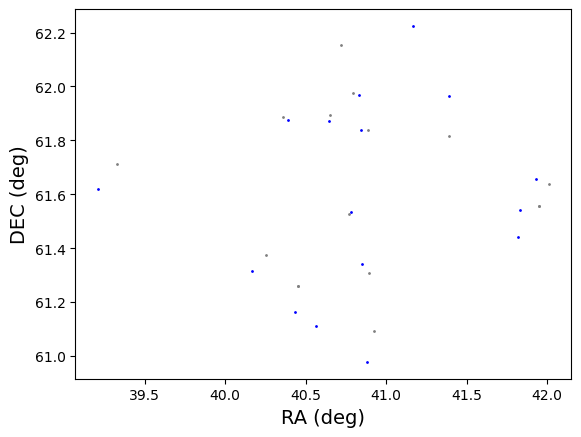

In [61]:
fig, ax = plt.subplots()

ax.scatter(population1.iloc[idx].RA_ICRS, population1.iloc[idx].DE_ICRS, s=1, c='grey')
ax.scatter(population1_lost.RA_ICRS, population1_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-52.5,-56.5)
#ax.set_xlim(222.5,229.5)

As expected, we have no duplicates in the limit of 1armin of separation. So we join the two catalogues to make one single.

In [62]:
#combined_catalog1 = pd.concat([population1, population1_lost], ignore_index=True)
#combined_catalog1.to_csv('Catalogues/NGC1027_GMM_Population1.csv', index=False)

- Members from the crossmatch with vG+2023.

In [63]:
population2

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
113,41.391974,60.440972,464797963461759488,0.8665,0.0250,2.589,-1.793,1.868,31,1.439,...,1.104,15.092919,15.710403,14.297459,1.412945,NaN,41.937564,41.391990,60.440964,0.900277
124,41.760686,60.667446,464824798418117120,0.9060,0.0240,2.491,-1.459,2.020,31,1.451,...,1.008,15.022243,15.609508,14.280652,1.328855,NaN,42.072503,41.760699,60.667437,0.939593
128,41.971368,60.869426,464833766309733248,0.8965,0.0135,2.625,-1.530,2.133,31,1.545,...,0.970,13.546622,13.889764,13.031779,0.857985,NaN,42.216559,41.971382,60.869417,0.930231
132,41.851684,60.892326,464836652527754368,0.9197,0.0136,2.608,-1.809,1.878,31,1.540,...,1.006,12.826741,13.182690,12.293089,0.889601,NaN,42.260835,41.851700,60.892318,0.941174
141,41.581220,61.004063,464850770077768704,0.8678,0.0230,2.656,-1.653,2.079,31,1.437,...,1.014,14.985799,15.615413,14.209435,1.405977,NaN,42.415918,41.581235,61.004054,0.901501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,39.368128,62.490349,466057728911784448,0.9044,0.0256,2.856,-2.004,2.034,31,1.451,...,0.945,15.149142,15.735953,14.405804,1.330150,NaN,44.203078,39.368148,62.490340,0.937237
1159,39.696708,63.156088,466112807573205248,0.9259,0.0314,2.759,-1.952,1.950,31,1.460,...,1.006,15.738831,16.299076,15.020844,1.278232,NaN,44.739631,39.696727,63.156079,0.958138
1315,41.991454,62.738428,467345360106608000,0.9009,0.0461,2.854,-1.732,2.268,31,1.452,...,1.002,16.083628,16.674650,15.347731,1.326920,NaN,43.921722,41.991470,62.738418,0.929409
1436,38.075159,62.268499,513984032015800064,0.8460,0.0231,2.857,-1.970,2.068,31,1.488,...,0.980,14.957641,15.442095,14.297846,1.144249,NaN,44.262748,38.075178,62.268490,0.878511


In [64]:
population2_lost

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
174,41.773826,60.540374,464776037646911104,0.8545,0.1063,2.811,-1.799,2.160,31,1.362,...,0.988,17.921892,18.853360,16.956484,1.896875,NaN,41.953426,41.773842,60.540364,0.882463
237,41.611977,60.973933,464850499494348160,0.9201,0.0283,2.533,-1.594,1.968,31,1.427,...,0.995,15.476273,16.141022,14.678472,1.462549,NaN,42.382331,41.611992,60.973924,0.953797
240,41.387135,61.069233,464853660598221568,0.8285,0.0914,2.552,-1.825,1.784,31,1.386,...,1.369,17.162060,17.907494,16.247490,1.660004,NaN,42.513499,41.387151,61.069225,0.859669
314,42.251070,61.276006,464941655887679104,0.8647,0.0477,2.355,-1.681,1.650,31,1.428,...,1.070,16.552422,17.206670,15.765858,1.440813,NaN,42.535251,42.251086,61.275999,0.893889
334,42.129509,61.202537,464952681062317696,0.8452,0.0953,2.652,-1.683,2.050,31,1.381,...,0.990,17.742489,18.591160,16.850595,1.740564,NaN,42.491296,42.129525,61.202528,0.874296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,40.799686,62.532005,466023644050466560,0.9817,0.0642,2.630,-1.725,1.986,31,1.393,...,0.998,17.081020,17.874979,16.217472,1.657507,NaN,43.960869,40.799703,62.531996,1.012394
1603,39.226658,62.617307,466071434144149120,0.9070,0.0485,2.808,-1.993,1.979,31,1.414,...,0.970,16.447214,17.155657,15.630446,1.525211,NaN,44.345737,39.226677,62.617298,0.936223
1903,42.672829,62.162159,467252240914244480,0.9654,0.0409,2.769,-1.700,2.186,31,1.426,...,1.007,16.238014,16.906803,15.442007,1.464796,NaN,43.267141,42.672845,62.162149,0.994258
2072,41.114886,62.905429,467535884855567872,0.9308,0.0180,2.818,-1.936,2.048,31,1.433,...,0.945,8.369972,9.017055,7.584709,1.432346,-43.63,44.239616,41.114905,62.905420,0.959092


Text(0, 0.5, 'DEC (deg)')

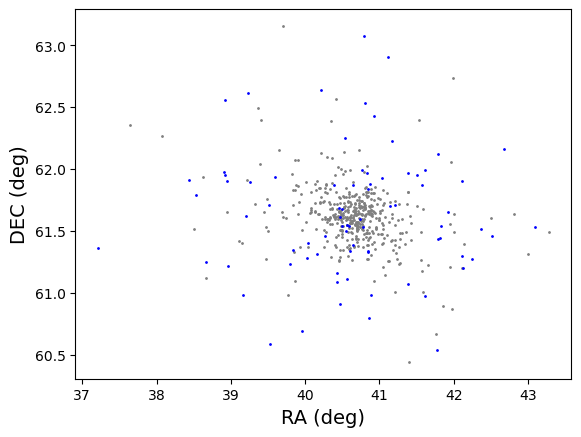

In [66]:
fig, ax = plt.subplots()

ax.scatter(population2.RA_ICRS, population2.DE_ICRS, s=1, c='grey')
ax.scatter(population2_lost.RA_ICRS, population2_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-52.5,-56.5)
#ax.set_xlim(222.5,229.5)

Verifying duplicates.

In [67]:
sky1 = SkyCoord(ra=population2.RA_ICRS, dec=population2.DE_ICRS,unit='degree')
sky2 = SkyCoord(ra=population2_lost.RA_ICRS, dec=population2_lost.DE_ICRS,unit='degree')

# Fazer o crossmatch
idx, d2d, _ = sky2.match_to_catalog_sky(sky1)

# Definir uma tolerância máxima para duplicatas
max_sep = 1.0 * u.arcsec
duplicates = d2d < max_sep

In [68]:
duplicates

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

Text(0, 0.5, 'DEC (deg)')

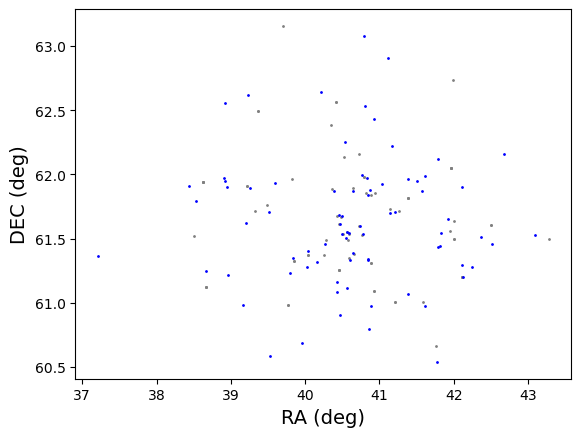

In [69]:
fig, ax = plt.subplots()

ax.scatter(population2.iloc[idx].RA_ICRS, population2.iloc[idx].DE_ICRS, s=1, c='grey')
ax.scatter(population2_lost.RA_ICRS, population2_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-52.5,-56.5)
#ax.set_xlim(222.5,229.5)

As expected, we have no duplicates in the limit of 1armin of separation. So we join the two catalogues to make one single.

In [70]:
#combined_catalog2 = pd.concat([population2, population2_lost], ignore_index=True)
#combined_catalog2.to_csv('Catalogues/NGC1027_GMM_Population2.csv', index=False)

In [24]:
#population1_lost.to_csv('../Catalogues/NGC1027_population1_lost.csv', index=False)
#population2_lost.to_csv('../Catalogues/NGC1027_population2_lost.csv', index=False)